In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resource/Final_api_movie_2019.csv")

In [3]:
df.columns

Index(['ID', 'Title', 'Adult', 'Budget', 'Genres', 'Language',
       'Production Company', 'Popularity', 'Revenue', 'Production Country',
       'Release Date', 'Run Time', 'Vote Average', 'Vote Count', 'imdb_id',
       'omdb_id', 'omdb_title', 'omdb_year', 'omdb_rated', 'omdb_released',
       'omdb_runtime', 'omdb_director', 'omdb_actors', 'omdb_language',
       'omdb_country', 'omdb_ratings', 'omdb_metascore', 'omdb_imdbRating',
       'omdb_imdbVotes'],
      dtype='object')

In [4]:
clean_df = df[['omdb_title','Genres','omdb_released','omdb_runtime','omdb_country','omdb_imdbRating','omdb_imdbVotes','Revenue']]

In [5]:
clean_df.head()

,omdb_title,Genres,omdb_released,omdb_runtime,omdb_country,omdb_imdbRating,omdb_imdbVotes,Revenue
0,Joker,"['Crime', 'Thriller', 'Drama']",04 Oct 2019,122 min,"USA, Canada",8.9,"360,218",568509478
1,Maleficent: Mistress of Evil,"['Fantasy', 'Adventure', 'Family']",18 Oct 2019,118 min,USA,NaN,NaN,0
2,The Lion King,"['Adventure', 'Animation', 'Drama']",19 Jul 2019,118 min,USA,7.1,"102,621",1649676757
3,Terminator: Dark Fate,"['Action', 'Science Fiction']",01 Nov 2019,NaN,"China, USA",NaN,NaN,0
4,Spider-Man: Far from Home,"['Action', 'Adventure', 'Science Fiction']",02 Jul 2019,129 min,USA,7.7,"187,214",1131450163


In [6]:
clean_df['omdb_released'] =  pd.to_datetime(clean_df['omdb_released'])
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
omdb_title         9753 non-null object
Genres             9994 non-null object
omdb_released      9641 non-null datetime64[ns]
omdb_runtime       9554 non-null object
omdb_country       9690 non-null object
omdb_imdbRating    9579 non-null float64
omdb_imdbVotes     9579 non-null object
Revenue            9994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 624.8+ KB
None


In [7]:
clean_df = clean_df.dropna(how='any').sort_values('omdb_released',ascending=True)
clean_df = clean_df.rename(columns={'omdb_title':'Title','omdb_released':'Release Date',
                                    'omdb_runtime':'Runtime (min)','omdb_country':'Country',
                                    'omdb_imdbRating':'imdb_Rating','omdb_imdbVotes':'imdb_Votes'})

clean_df = clean_df[clean_df['Release Date'].isin(pd.date_range(start='2009', end='20191028'))]

In [8]:
clean_df['Runtime (min)'] = clean_df['Runtime (min)'].str.replace(' min','').astype(np.uint8)

In [9]:
clean_df = clean_df[clean_df.Country.str.contains("USA")]

In [10]:
group_mean_df = clean_df[['Release Date', 'Runtime (min)']]
group_mean_df['Release Date'] = group_mean_df['Release Date'].dt.strftime('%Y')
group_mean_df = group_mean_df.groupby('Release Date').mean().reset_index()

In [11]:
avg_runtime = clean_df['Runtime (min)'].mean()
print(avg_runtime)

95.64657383657017


In [12]:
group_all_df = clean_df[['Release Date', 'Runtime (min)']]

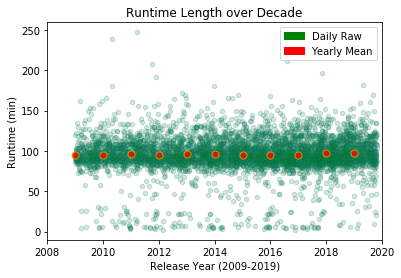

In [35]:
plt.scatter(group_all_df['Release Date'],group_all_df['Runtime (min)'], alpha=0.2,edgecolors='g',s=20 )
plt.scatter(group_mean_df['Release Date'],group_mean_df['Runtime (min)'],alpha=0.8,c='r',edgecolors='y',s=50)
plt.xlabel('Release Year (2009-2019)')
plt.xlim('2008','2020')
plt.ylabel('Runtime (min)')
plt.title('Runtime Length over Decade')
green_scatter = mpatches.Patch(color='g', label='Daily Raw')
red_scatter = mpatches.Patch(color='r', label='Yearly Mean')
plt.legend(handles=[green_scatter,red_scatter])

plt.savefig("Outputs/Release_vs_Runtime.png")

plt.show()

In [14]:
clean_df.head()

,Title,Genres,Release Date,Runtime (min),Country,imdb_Rating,imdb_Votes,Revenue
9608,Hackers Wanted,"['Action', 'Thriller', 'Documentary']",2009-01-01,86,USA,6.4,157,0
6826,Alien Trespass,"['Action', 'Adventure', 'Comedy', 'Science Fic...",2009-01-01,90,"USA, Canada",5.7,"3,488",0
9057,The Nanny Express,"['Drama', 'Romance', 'Family', 'Comedy', 'TV M...",2009-01-03,120,USA,6.7,"1,135",0
901,An American Girl: Chrissa Stands Strong,"['Drama', 'Family']",2009-01-05,91,USA,6.2,819,0
3515,Behind Enemy Lines: Colombia,"['War', 'Action', 'Thriller']",2009-01-06,94,USA,4.8,"4,179",0


In [15]:
genre_df = clean_df[['Release Date','Genres']]
new_df= pd.DataFrame(genre_df.Genres.str.split(",").tolist(), index=genre_df['Release Date']).stack()
new_df = new_df.str.replace(r'[^a-zA-Z]\s?',r'',regex=True)

In [16]:
genre_date_df = new_df.reset_index([0,'Release Date'])
genre_date_df.columns = ['Release Date','Genres']
genre_date_df['Release Date'] = genre_date_df['Release Date'].dt.strftime('%Y')

In [17]:
genre_date_df['Genres'].replace('', np.nan, inplace=True)
genre_date_df.dropna(subset=['Genres'],inplace=True,how='any')

In [18]:
group_genre_df = genre_date_df.groupby('Release Date')['Genres'].value_counts()
group_genre_df = group_genre_df.to_frame(name='Total Count').reset_index()
#group_genre_df = group_genre_df[group_genre_df['Total Count'] >= 50]

In [19]:
group_genre_pivot = group_genre_df.pivot(index='Genres',columns='Release Date',values='Total Count').fillna(value=0)

In [24]:
group_genre_pivot['Total'] = group_genre_pivot.T.sum()
group_genre_pivot = group_genre_pivot[group_genre_pivot['Total'] >= 1000]

In [27]:
group_genre_T = group_genre_pivot.T
group_genre_T = group_genre_T[:-1]
group_genre_T

Genres,Action,Comedy,Drama,Thriller
Release Date,,,,
2009,85,140,130,107
2010,97,135,155,105
2011,85,150,166,109
2012,90,144,161,110
2013,90,137,177,141
2014,98,153,209,136
2015,112,171,226,157
2016,110,178,233,154
2017,120,170,270,183


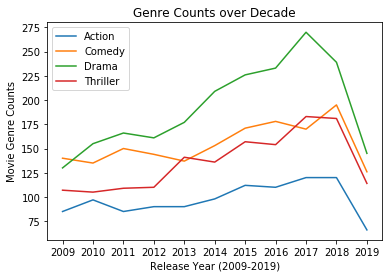

In [43]:
Action_plot, = plt.plot(group_genre_T.index, group_genre_T['Action'])
Comedy_plot, = plt.plot(group_genre_T.index, group_genre_T['Comedy'])
Drama_plot, = plt.plot(group_genre_T.index, group_genre_T['Drama'])
Thriller_plot, = plt.plot(group_genre_T.index, group_genre_T['Thriller'])

plt.xlabel('Release Year (2009-2019)')
plt.ylabel('Movie Genre Counts')
plt.title('Genre Counts over Decade')
plt.legend((Action_plot,Comedy_plot,Drama_plot,Thriller_plot),('Action','Comedy','Drama','Thriller'),loc=2)

plt.savefig("Outputs/Release_vs_Genre.png")
plt.show()